# MULTICLASS Exercise with Iris Dataset

In [1]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Dataset from Sklearn
from sklearn.datasets import load_iris

In [3]:
## Add to Variable
iris = load_iris()

In [4]:
## Define Information (Dictionary Key) from dataset
iris.keys()
## Result: there are 8 information available in total

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
## Describe Datasets
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
## Describe Features of Dataset
iris['feature_names']
## Result: there are 4 features available

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
## Describe Target of Dataset
iris['target']
## Result: target of prediction are numeric and has value of either 0, 1 or 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
## Describe Target of Dataset
iris['target_names']
## Result: prediction will be made to classify features into either Setosa, Versicolor or Virginica (type of Iris plants)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
## Convert as DataFrame
df = pd.DataFrame(data=iris['data'],
                    columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
## Show DataFrame
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
## Insert target column into DataFrame
df['target'] = iris['target']
## Show DataFrame
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
## Describe information of DataFrame
df.info()
## Result: no preliminary missing value detected, features are in float while target are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
## Confirm no missing value
df.isna().sum()
## Result: Confirmed

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [15]:
## Check distribution of values in target
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [16]:
## Describe column information
df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
## Add target name to DataFrame
df['species'] = df['target'].apply(lambda x: iris['target_names'][x])
## Show DataFrame
df.head()

,sepal length,sepal width,petal length,petal width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


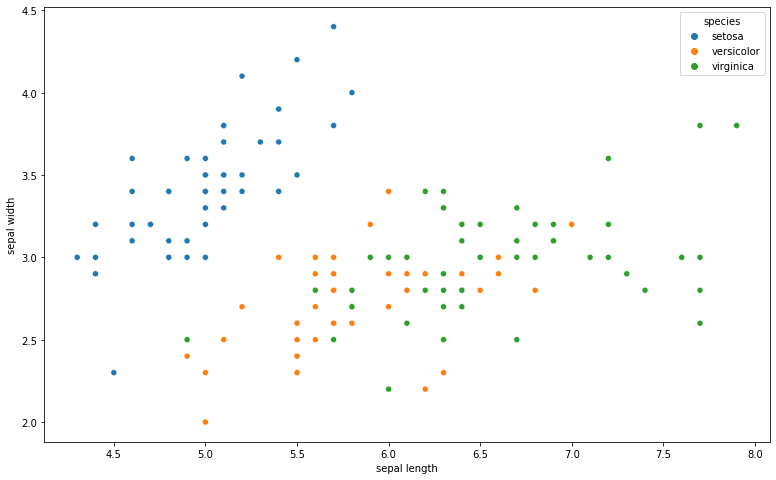

In [18]:
## Visualize relationship of features with Scatterplot
plt.figure(figsize=(13,8))
sns.scatterplot( x='sepal length', y='sepal width', hue='species', data=df)
plt.show()

<hr>

## 2. Machine Learning Modelling

### Splitting Data

In [19]:
## Import Package
from sklearn.model_selection import train_test_split

In [20]:
## Define features and target
x = df.drop(columns=['target', 'species'])
y = df['species']

In [21]:
## Split data into 80% training set : 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

### Logistic Regression One vs Rest

In [48]:
## Import Package
from sklearn.linear_model import LogisticRegression

In [27]:
## Build LogReg model with Multiclass
LR = LogisticRegression(multi_class='ovr')
# multi_class parameter: 
    ## 'ovr' or 'auto' = One vs Rest
    ## 'ovo' = One vs One -> obsolete, can not be used anymore
    ## multinomial

### LogReg One vs Rest - Evaluation Matrix

In [28]:
## Import package
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [43]:
## Create Function to perform Evaluation Matrix scoring for Model
def Eva_Matrix(model, x_train, x_test, y_train,y_test, Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train, y_pred_train)
    rec_train=recall_score(y_train, y_pred_train, average='macro')
    prec_train=precision_score(y_train, y_pred_train, average='macro')
    f1_train=f1_score(y_train, y_pred_train, average='macro')

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test, y_pred_test)
    rec_test=recall_score(y_test, y_pred_test, average='macro')
    prec_test=precision_score(y_test, y_pred_test, average='macro')
    f1_test=f1_score(y_test, y_pred_test, average='macro')
    
    # average='macro'-> because target consist of 3 values
    ## Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

    data={
    Nama + ' Training':[acc_train, rec_train, prec_train, f1_train],
    Nama + ' Testing':[acc_test, rec_test, prec_test, f1_test]
}

    df=(pd.DataFrame(data,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train, y_pred_train)
    cm_train=confusion_matrix(y_train, y_pred_train, labels=['setosa', 'versicolor', 'virginica'])
    df_train=pd.DataFrame(data = cm_train,
                            columns = ['Pred setosa', 'Pred versicolor', 'Pred virginica'],
                            index = ['Act setosa', 'Act versicolor', 'Act virginica'])

    cr_test=classification_report(y_test, y_pred_test)
    cm_test=confusion_matrix(y_test, y_pred_test, labels=['setosa', 'versicolor', 'virginica'])
    df_test=pd.DataFrame(data = cm_test,
                            columns = ['Pred setosa', 'Pred versicolor', 'Pred virginica'],
                            index = ['Act setosa', 'Act versicolor', 'Act virginica'])

    return df, cr_train, df_train, cr_test, df_test

In [44]:
## Run Function for LogReg One vs One
df_LR_ovr, cr_LR_ovr_tr, cm_LR_ovr_tr, cr_LR_ovr_ts, cm_LR_ovr_ts = Eva_Matrix(LR,
                                                                                x_train, x_test,
                                                                                y_train, y_test,
                                                                                'LogReg One vs Rest')

In [45]:
## Show Evaluation Matrix
df_LR_ovr

,Accuracy,Recall,Precision,F1
LogReg One vs Rest Training,0.9500,0.9500,0.9507,0.9500
LogReg One vs Rest Testing,0.9333,0.9333,0.9444,0.9327


In [59]:
## Show Classification Report
print(cr_LR_ovr_ts)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



**CONFUSION MATRIX FOR MULTICLASS**

Actual/Prediction | Setosa (Predicted) | Versicolor (Predicted) | Virginica (Predicted)
-----|-----|-----|-----
Setosa (Actual)|True-Setosa|False-Versicolor1|False-Setosa1
Versicolor (Actual)|False-Setosa1|True-Versicolor|False-Setosa2
Virginica (Actual)|False-Setosa2|False-Versicolor2|True-Setosa

In [47]:
## Show Confusion Matrix - Testing
cm_LR_ovr_ts
## False prediction only appear on Virginica (prediction) - Versicolor (actual)

,Pred setosa,Pred versicolor,Pred virginica
Act setosa,10,0,0
Act versicolor,0,8,2
Act virginica,0,0,10


### LogReg Multinomial - Evaluation Matrix

In [60]:
## Run Function for LogReg Multinomial
df_LR_multi, cr_LR_multi_tr, cm_LR_multi_tr, cr_LR_multi_ts, cm_LR_multi_ts = Eva_Matrix(LogisticRegression(multi_class='multinomial'),
                                                                                            x_train, x_test,
                                                                                            y_train, y_test,
                                                                                            'LogReg Multinomial')

In [61]:
## Show Evaluation Matrix and Compare to LogReg
summary = pd.concat([df_LR_ovr, df_LR_multi])
summary

,Accuracy,Recall,Precision,F1
LogReg One vs Rest Training,0.9500,0.9500,0.9507,0.9500
LogReg One vs Rest Testing,0.9333,0.9333,0.9444,0.9327
LogReg Multinomial Training,0.9750,0.9750,0.9752,0.9750
LogReg Multinomial Testing,0.9667,0.9667,0.9697,0.9666


Overall score for Multinomial is better than One vs Rest

In [63]:
## Show Classification Report
print(cr_LR_multi_ts)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [65]:
## Show Confusion Matrix - Testing
cm_LR_multi_ts
## False prediction only appear on Virginica (prediction) - Versicolor (actual) - 1 case less than One vs Rest

,Pred setosa,Pred versicolor,Pred virginica
Act setosa,10,0,0
Act versicolor,0,9,1
Act virginica,0,0,10


### Decision Tree

In [66]:
## Import Package
from sklearn.tree import DecisionTreeClassifier

In [67]:
## Run Function for Decision Tree
df_DT, cr_DT_tr, cm_DT_tr, cr_DT_ts, cm_DT_ts = Eva_Matrix(DecisionTreeClassifier(),
                                                            x_train, x_test,
                                                            y_train, y_test,
                                                            'Decision Tree')

In [68]:
## Show Evaluation Matrix and Compare to LogReg
summary = pd.concat([summary, df_DT])
summary

,Accuracy,Recall,Precision,F1
LogReg One vs Rest Training,0.9500,0.9500,0.9507,0.9500
LogReg One vs Rest Testing,0.9333,0.9333,0.9444,0.9327
LogReg Multinomial Training,0.9750,0.9750,0.9752,0.9750
LogReg Multinomial Testing,0.9667,0.9667,0.9697,0.9666
Decision Tree Training,1.0000,1.0000,1.0000,1.0000
Decision Tree Testing,0.9667,0.9667,0.9697,0.9666


Testing set for Decision Tree is similar to Multinomial, but Model could predict perfectly on training set.

In [58]:
## Show Classification Report - Testing
print(cr_DT_ts)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [56]:
## Show Confusion Matrix - Testing
cm_DT_ts
## False prediction appear on Virginica (prediction) - Versicolor (actual) and Versicolor (prediction) - Virginica (actual)

,Pred setosa,Pred versicolor,Pred virginica
Act setosa,10,0,0
Act versicolor,0,9,1
Act virginica,0,1,9


<hr>

## 3. Export Model

### Alternative 1

In [69]:
## Import Package
import joblib

In [75]:
## Export Model to .jbl file
joblib.dump(LR, 'ModelIris_v.1.0.jbl')

['ModelIris_v.1.0.jbl']

In [76]:
## Predict with dummy data
LR.predict([[1.5, 2.5, 2.1, 3.1]])[0]

'setosa'

### Alternative 2

In [77]:
## Import Package
import pickle

In [80]:
## Export Model with Write Binary (wb)
pickle.dump(LR, open('ModelIris_v.1.0.pkl', 'wb') )

<hr>

## 4. Import Model

In [83]:
## Import Model with Read Binary (rb)
Model_pkl = pickle.load(open('ModelIris_v.1.0.pkl', 'rb'))

In [84]:
## Predict with dummy data
Model_pkl.predict([[1.5, 2.5, 2.1, 3.1]])[0]

'setosa'